# **ch.03 회귀 알고리즘과 모델 규제**  
## 03-3 특성 공학과 규제  
### 풀어야 할 문제:  
> ### 앞선 polynomial regression model의 underfitting을 다양한 feature를 활용하여 해결하라.  
### *다중 회귀*  
multiple regerssion: 여러 개의 feature를 사용한 linear regression, feature가 많은 high-dimension에서는 linear regression이 매우 복잡한 model을 표현


1 feature: linear regression learns line  
2 feature: linear regression(multiple regression) learns plane


feature engineering: 기존의 feature를 활용해 새로운 feature를 뽑아내는 작업


### *데이터 준비* 
1. pandas의 read_csv() function을 사용하여 factor로 전달하는 address에서 csv file을 download하고 dataframe으로 만들기
2. dataframe의 to_numpy() method를 사용하여 numpy array로 변환

In [4]:
import pandas as pd

# 1
df = pd.read_csv('https://bit.ly/perch_csv_data')

# 2
perch_full = df.to_numpy()

print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

target data 준비

In [5]:
import numpy as np


perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train set, test set 나누기

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### *사이킷런의 변환기*
scikit-learn은 feature를 만들거나 preprocessing하기 위한 다양한 class를 제공하는데, 이를 transformer라고 함  
transformer class는 model class의 fit(), score(), predict() method와 같이 fit(),transform() method를 제공


transformer class 중 PolynomialFeature가 새롭게 만드는  feature(특성 항):  
+ parameter로 전달되는 각 feature의 square term  
+ 각 feature를 multiply한 term
+ intercept term

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

scikit-learn의 linear model은 자동으로 intercept를 추가하기 때문에 굳이 feature를 만들 필요가 없음. include_bias parameter를 False로 지정해 다시 transform feature

In [8]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

위 transfrom(feature engineering)을 train_input에 적용

In [9]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

(42, 9)


get_feature_names() method를 call하여 feature가 어떻게 만들어졌는지 확인

In [10]:
poly.get_feature_names()

/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

trasform test set

In [11]:
test_poly = poly.transform(test_input)

### *다중 회귀 모델 훈련하기*
multiple regression의 train은 linear regression의 train과 같음. 다만 여러 개의 feature를 사용하여 linear regression을 수행하는 것


import LinearRegression class,  
generate class object,  
train_poly로 train model,

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_poly, train_target)

LinearRegression()

score model  
&rarr; train score > test score  
$\therefore$ underfitting 해결

In [16]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594178


feature를 더 늘려보자. PolynomialFeature의 degree parameter를 사용하여 5제곱까지 feature를 만들어 출력

In [17]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

(42, 55)


feature engineering을 거친 train set으로 train model

In [18]:
lr.fit(train_poly, train_target)

LinearRegression()

score model  
&rarr; train > test, test가 음수  
$\therefore$ 아주 심각한 overfitting

In [19]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999997806
-144.4049060247339


feature를 크게 늘리면 linear model은 아주 강력. 그러나 이러한 model은 train set에 심각하게 overfitting되므로 test set에 대해서는 형편없음

### *규제*  
regularization: machine-learning model이 train set를 과도하게 학습하지 못하도록 하는 것  
linear regression model의 경우, feature에 곱해지는 coefficient(gradient)의 크기를 작게하는 것


regularization 전에 feature scale에 대한 normalization을 하지 않으면 coefficient의 값에도 차이 발생  
&rarr; regularization이 제대로 효과를 내지 못함  
$\therefore$ feature scale normalizaion이 먼저


scikit-learn의 StandardScaler class(transformer class)를 사용하여 z score로 normalization

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### *릿지 회귀*  
ridge: linear regression model에 squared coefficient value를 기준으로 regularizaion을 적용한 model


import Ridge class,  
generate class object,  
train_scaled로 train ridge model

In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(train_scaled, train_target)

Ridge()

score model  
&rarr; train > test, test value 적절  
$\therefore$ 정상

In [22]:
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615388


ridge와 lasso를 사용할 때 regularization의 양을 alpha parameter를 통해 조절할 수 있음.


alpha &uarr;:
+ regularization 강도가 세짐
+ coefficient value를 더 줄임
+ underfitting에 가깝도록 유도


alpha &darr;:
+ regularization 강도가 약해짐
+ coefficient value를 덜 줄임
+ overfitting에 가깝도록 유도

최적의 alpha value를 찾는 방법 중 한 가지는 alpha에 대한 $R^2$의 그래프를 그리는 것  
train set과 test set의 score value($R^2$)가 가장 가까운 지점이 최적의 alpha value


alpha value를 바꿀 때마다 score를 저장할 list 만들기

In [23]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha를 0.001 ~ 100까지 10배씩 늘려가며 ridge model을 train & score &rarr; score를 list에 저장

In [24]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    
    ridge.fit(train_scaled, train_target)
    
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

graph 그리기  
alpha vlaue를 0.001부터 10배씩 늘리기 때문에 alpha를 그래도 사용할 경우, graph 왼쪽이 빽빽해짐 &rarr; log function으로 바꾸어 지수로 표현

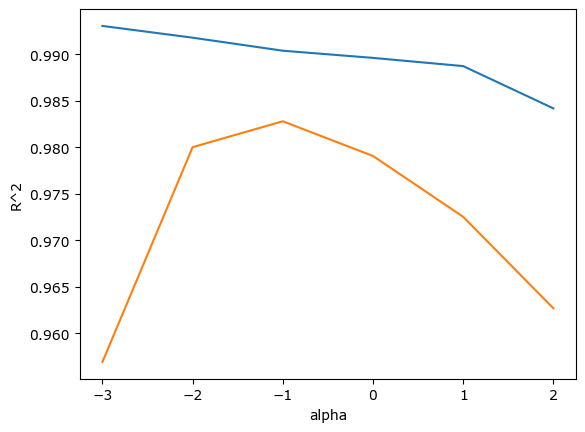

In [25]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

graph에서 볼 수 있듯, 가장 적절한 alpha vlaue = $log_{10}{-1}$ = 0.1


alpha = 0.1로 train ridge

In [26]:
ridge = Ridge(alpha=0.1)

ridge.fit(train_scaled, train_target)

Ridge(alpha=0.1)

score model

In [29]:
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386955


### *라쏘 회귀*
lasso: linear regression model에 coefficient의 absolute value를 기준으로 regularizaion을 적용한 model  lasso는 coefficient value를 0으로 만들기도 하기 때문에, lasso보다는 ridge를 선호함


import Lasso class,  
generate class object,  
train_scaled로 train lasso model

In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(train_scaled, train_target)

Lasso()

score model  
&rarr; train > test, test value 적절  
$\therefore$ 정상

In [31]:
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


ridge와 마찬가지로 alpha value를 조정하며 model을 train한 뒤 각 score를 저장하고 alpha에 대한 score graph를 그려 최적의 alpha value 찾기 

In [34]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    lasso.fit(train_scaled, train_target)
    
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/private/var/containers/Bundle/Application/138F3D65-EE25-402E-9D8D-6C8F0FACAC5C/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


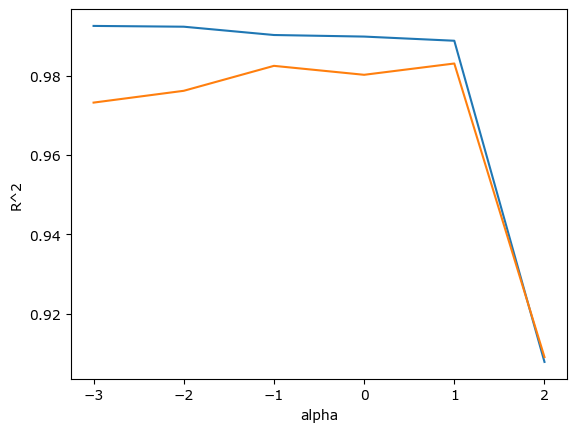

In [35]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

lasso에서 최적의 alpha vlaue = $log_{10}{1}$ = 10


alpha = 10으로 trian lasso

In [36]:
lasso = Lasso(alpha=10)

lasso.fit(train_scaled, train_target)

Lasso(alpha=10)

score model

In [37]:
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


lasso는 coefficient를 0으로 만들기도 함. lasso의 coefficient는 coef_에 저장되어 있음. numpy의 sum() function을 사용해 coef_ 중 0인 것을 세보기

In [38]:
print(np.sum(lasso.coef_==0))

40


40개의 coefficient가 0이 됨 &rarr; lasso가 사용한 feature는 15개


이와 같은 lasso의 특징 때문에 lasso를 유용한 feature를 골라는 용도로 사용할 수 있음